In [1]:
## Carregando pacotes

import pandas as pd
import numpy as np
from sklearn import preprocessing

# from sklearn import tree
# from sklearn.neural_network import MLPClassifier
from sklearn.svm import NuSVR
# from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_csv("dados_artigo.csv",header=1)
res = pd.DataFrame()

In [2]:
## Ajustando a variável R
X = np.array(dados[["NaCl",	"Rt (rpm)",	"T(°C)","t (min)",	"DB (%)","pH","Co (mg/L)"]])
yr= np.array(dados["R(%)"])
X_train, X_test, yr_train, yr_test = train_test_split(X,  yr, test_size=0.2, random_state=42)

# y_test = y_test.reshape(-1, 1)
# print(y_test)
Xs = preprocessing.MinMaxScaler(feature_range=(0, 1))
ys = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Xs = preprocessing.StandardScaler()
# ys = preprocessing.StandardScaler()

# Xs = preprocessing.MinMaxScaler(feature_range=(0, 1))
# ys = preprocessing.StandardScaler()

# Xs = preprocessing.StandardScaler()
# ys = preprocessing.MinMaxScaler(feature_range=(0, 1))


Xs.fit(X_train)
X_train_norm = Xs.transform(X_train)
X_test_norm = Xs.transform(X_test)

ys.fit(yr_train.reshape(-1, 1))
yr_train_norm = ys.transform(yr_train.reshape(-1, 1))
yr_test_norm = ys.transform(yr_test.reshape(-1, 1))

svrr = NuSVR(tol=1e-05,verbose=True,gamma="scale")
svrr.fit(X_train_norm,yr_train_norm.ravel())
ypr = svrr.predict(X_test_norm)


scr_r_r2 = r2_score(yr_test_norm.ravel(),ypr)
scr_r_mse = mean_squared_error(yr_test_norm.ravel(),ypr)


res["dados R normalizado"]=yr_test_norm.ravel()
res["predito R normalizado"] = ypr

res["dados R"] = yr_test.ravel()
res["predito R"] = ys.inverse_transform(ypr.reshape(-1,1)).ravel()

# ax = sns.regplot(res,x="dados R",y="predito R",ci=80)
# ax.set_title('rˆ2 = '+ "{:.2f}".format(scr))
# print(yr_test_norm.ravel())


[LibSVM]........*
optimization finished, #iter = 2587
epsilon = 0.024718
obj = -7.026635, rho = -0.628254
nSV = 101, nBSV = 67


In [3]:
## Ajustando a variável Cf
X = np.array(dados[["NaCl",	"Rt (rpm)",	"T(°C)","t (min)",	"DB (%)","pH","Co (mg/L)"]])
ycf = np.array(dados["Cf (mg/L)"])
X_train, X_test, ycf_train, ycf_test = train_test_split(X,  ycf, test_size=0.2, random_state=None)

# y_test = y_test.reshape(-1, 1)
# print(y_test)
Xs = preprocessing.MinMaxScaler(feature_range=(0, 1))
ys = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Xs = preprocessing.StandardScaler()
# ys = preprocessing.StandardScaler()

# Xs = preprocessing.MinMaxScaler(feature_range=(0, 1))
# ys = preprocessing.StandardScaler()

# Xs = preprocessing.StandardScaler()
# ys = preprocessing.MinMaxScaler(feature_range=(0, 1))


Xs.fit(X_train)
X_train_norm = Xs.transform(X_train)
X_test_norm = Xs.transform(X_test)

ys.fit(ycf_train.reshape(-1, 1))
ycf_train_norm = ys.transform(ycf_train.reshape(-1, 1))
ycf_test_norm = ys.transform(ycf_test.reshape(-1, 1))

svrcf = NuSVR(tol=1e-05,verbose=True,gamma="scale")
svrcf.fit(X_train_norm,ycf_train_norm.ravel())
ypcf = svrcf.predict(X_test_norm)
# ypcf = ys.inverse_transform(ypcf.reshape(-1, 1))

res["dados Cf normalizado"] = ycf_test_norm.ravel()
res["predito Cf normalizado"] = ypcf

res["dados Cf"] = ycf_test.ravel()
res["predito Cf"] = ys.inverse_transform(ypcf.reshape(-1, 1)).ravel()

scr_cf_r2 = r2_score(ycf_test_norm.ravel(),ypcf)
scr_cf_mse = mean_squared_error(ycf_test_norm.ravel(),ypcf)

# ax = sns.regplot(res,x="dados Cf",y="predito Cf",ci=80)
# ax.set_title('rˆ2 = '+ "{:.2f}".format(sccf))

[LibSVM].......................*
optimization finished, #iter = 7431
epsilon = 0.009545
obj = -4.729676, rho = -0.307850
nSV = 100, nBSV = 62


In [4]:
## Ajustando a variável q
X = np.array(dados[["NaCl",	"Rt (rpm)",	"T(°C)","t (min)",	"DB (%)","pH","Co (mg/L)"]])
yq = np.array(dados["q(mg/g)"])
X_train, X_test, yq_train, yq_test = train_test_split(X,  yq, test_size=0.2, random_state=None)

# y_test = y_test.reshape(-1, 1)
# print(y_test)
Xs = preprocessing.MinMaxScaler(feature_range=(0, 1))
ys = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Xs = preprocessing.StandardScaler()
# ys = preprocessing.StandardScaler()

# Xs = preprocessing.MinMaxScaler(feature_range=(0, 1))
# ys = preprocessing.StandardScaler()

# Xs = preprocessing.StandardScaler()
# ys = preprocessing.MinMaxScaler(feature_range=(0, 1))


Xs.fit(X_train)
X_train_norm = Xs.transform(X_train)
X_test_norm = Xs.transform(X_test)

ys.fit(ycf_train.reshape(-1, 1))
yq_train_norm = ys.transform(yq_train.reshape(-1, 1))
yq_test_norm = ys.transform(yq_test.reshape(-1, 1))

svrq = NuSVR(tol=1e-05,verbose=True,gamma="scale")
svrq.fit(X_train_norm,yq_train_norm.ravel())
scq = svrq.score(X_test_norm,yq_test_norm.ravel())

ypq = svrq.predict(X_test_norm)

res["dados q"] = yq_test.ravel()
res["predito q"] = ys.inverse_transform(ypq.reshape(-1,1)).ravel()

res["dados q normalizado"] = yq_test_norm.ravel()
res["predito q normalizado"] = ypq

scr_q_r2 = r2_score(yq_test_norm.ravel(),ypq)
scr_q_mse = mean_squared_error(yq_test_norm.ravel(),ypq)

# ax = sns.regplot(res,x="dados q",y="predito q",ci=80)
# ax.set_title('rˆ2 = '+ "{:.2f}".format(scq))

[LibSVM].............................................................................................*..............................................................*...................................*
optimization finished, #iter = 60999
epsilon = 0.000799
obj = -0.335853, rho = -0.024139
nSV = 113, nBSV = 57


Text(0.5, 1.0, 'rˆ2 = 0.92')

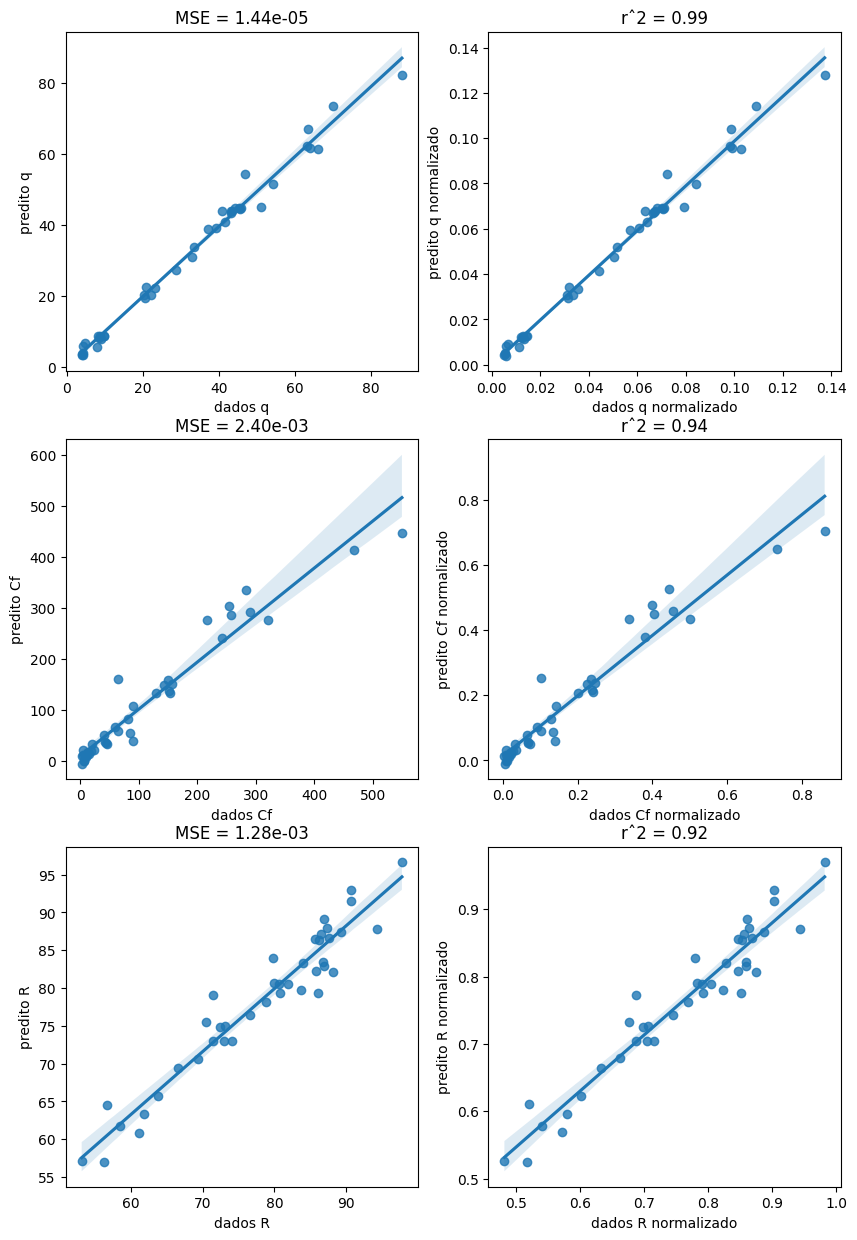

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
# fig.suptitle('Testanto título')
ax = sns.regplot(ax=axes[0,0],data=res,x="dados q",y="predito q",ci=95)
ax.set_title('MSE = '+ "{:.2e}".format(scr_q_mse))
ax = sns.regplot(ax=axes[0,1],data=res,x="dados q normalizado",y="predito q normalizado",ci=95)
ax.set_title('rˆ2 = '+ "{:.2f}".format(scr_q_r2))

ax = sns.regplot(ax=axes[1,0],data=res,x="dados Cf",y="predito Cf",ci=95)
ax.set_title('MSE = '+ "{:.2e}".format(scr_cf_mse))
ax = sns.regplot(ax=axes[1,1],data=res,x="dados Cf normalizado",y="predito Cf normalizado",ci=95)
ax.set_title('rˆ2 = '+ "{:.2f}".format(scr_cf_r2))

ax = sns.regplot(ax=axes[2,0],data=res,x="dados R",y="predito R",ci=95)
ax.set_title('MSE = '+ "{:.2e}".format(scr_r_mse))
ax = sns.regplot(ax=axes[2,1],data=res,x="dados R normalizado",y="predito R normalizado",ci=95)
ax.set_title('rˆ2 = '+ "{:.2f}".format(scr_r_r2))